In [1]:
# multiple_linear_regression_problem.m
# Kiran Gunnam

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
import matplotlib.patches as mpatches
from scipy.io import loadmat

#[Acceleration  Cylinders Displacement Horsepower Model_Year Weight  MPG  ]           
car_data= loadmat('car_mpg_data.mat')
data=car_data['data']
x= data[:,0:6] # x independent variable/experimental variable/predictor variable,  
y = data[:,6]           # y dependent variable/outcome variable  
n = np.size(y)          # data size


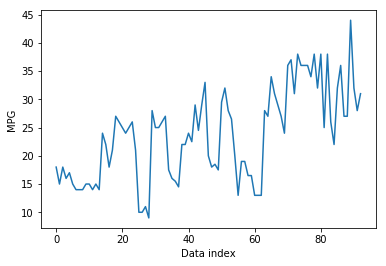

In [2]:
# Plot the data

plt.plot(y)

plt.ylabel('MPG');          # Set the y-axis label
plt.xlabel('Data index');





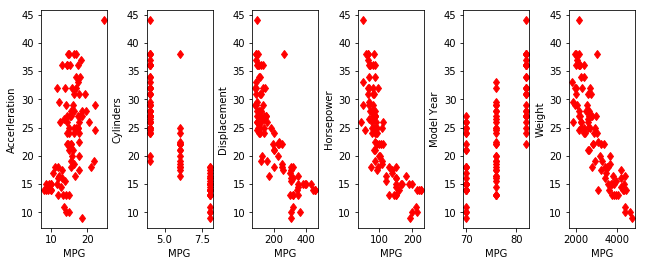

In [3]:


plt.subplot(1,6,1)
plt.plot(x[:,0],y,'rd');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Accerleration')

plt.subplot(1,6,2)
plt.plot(x[:,1],y,'rd');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Cylinders')

plt.subplot(1,6,3)
plt.plot(x[:,2],y,'rd');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Displacement')

plt.subplot(1,6,4)
plt.plot(x[:,3],y,'rd');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Horsepower')

plt.subplot(1,6,5)
plt.plot(x[:,4],y,'rd');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Model Year')


plt.subplot(1,6,6)
plt.plot(x[:,5],y,'rd');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Weight')

plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None,
                wspace=0.6, hspace=None)



In [4]:
# Now, we want to allow a non-zero intercept for our linear equation. 
# That is, we don't want to require that our fitted equation go through the origin. 
# In order to do this, we need to add a column of all ones to our x column.

# To make sure that regression line does not go through origin
# add a column of all ones (intercept term) to x

choice= int(input("Enter your choice "))

     # choice 1
if (choice == 1) :
    X =np.hstack([np.ones((n,1)), x[:,3:4]])
    num_predictors=1 #since we are using 1 terms as predictor

# Is it possible to improve above predictor choice?
# consider the following 5 additional choices. 

   #choice 2
elif (choice ==2) :
    X = np.hstack([np.ones((n,1)),x[:,3:6]])
    num_predictors=2 #since we are using 2 terms as predictors
    
    
    #choice 3
elif (choice==3) :
    X = np.hstack([np.ones((n,1)), x[:,3:4], x[:,5:6], x[:,3:4]*x[:,5:6]])
    num_predictors=3 #since we are using 3 terms as predictors

#choice 4
elif  (choice==4) :
    X = np.hstack([np.ones((n,1)), x[:,3:6]])
    num_predictors=3 #since we are using 3 terms as predictors

#choice 5
elif (choice ==5) :
    X = np.hstack([np.ones((n,1)),x]);
    num_predictors=6 #since we are using 6 terms as predictors

#choice 6
elif (choice ==6 ) :
    X = np.hstack([np.ones((n,1)), x, x[:,3:4]*x[:,5:6]]);
    num_predictors=7 #since we are using 7 terms as predictors


Enter your choice 5


/home/kaustubh/tf1/venv/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


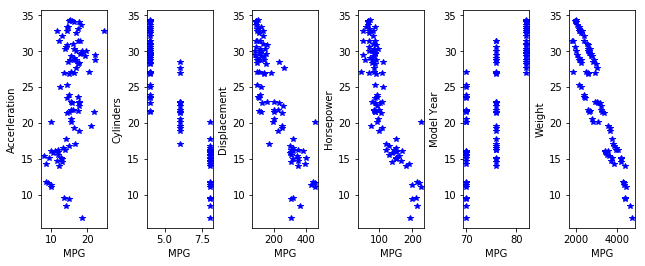

In [5]:
# Given a matrix equation
# X * theta=y, 
# the normal equation is that which minimizes the sum of the square differences 
# between the left and right sides:
# X'*X*theta=X'*y. 
# It is called a normal equation because y-X*theta is normal to the range of X.
# Here, X'*X is a normal matrix.

# Putting that into Octave:
# Calculate theta
# theta = (pinv(X'*X))*X'*y

# Or simply use backward slice operator
# theta =  X\y  %%minimize norm(X*theta-y) via a QR factorization
# we can also use the equivalent command 
# theta=mldivide(X,y)
# You should get theta = [ 325.57342 
#                          0.26343]. 
# This means that our fitted equation is as follows: 
# y = 0.26343x + 325.57342.

theta= lin.lstsq(X,y)[0]

# You can also use regress command to compute theta
# pkg load statistics
# theta= regress(y,X)

# y_est=X*theta;
y_est=np.matmul(X,theta)

# Now, let's plot our fitted equation (prediction) on top 
# of the training data, to see if our fitted equation makes 
# sense.

# Plot the fitted equation we got from the regression
# figure
# plotmatrix(x, y_est, 'b*')

plt.subplot(1,6,1)
plt.plot(x[:,0],y_est,'b*');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Accerleration')

plt.subplot(1,6,2)
plt.plot(x[:,1],y_est,'b*');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Cylinders')

plt.subplot(1,6,3)
plt.plot(x[:,2],y_est,'b*');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Displacement')

plt.subplot(1,6,4)
plt.plot(x[:,3],y_est,'b*');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Horsepower')

plt.subplot(1,6,5)
plt.plot(x[:,4],y_est,'b*');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Model Year')


plt.subplot(1,6,6)
plt.plot(x[:,5],y_est,'b*');   #Plot the data; marker 'rd' =red diamonds
plt.xlabel('MPG')
plt.ylabel('Weight')

plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None,
                wspace=0.6, hspace=None)


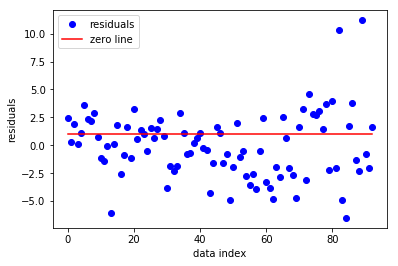

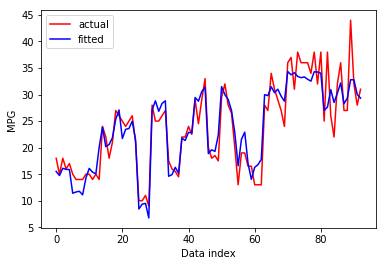

In [6]:
# Evaluate each fit you make in the context of your data. For example, 
# if your goal of fitting the data is to extract coefficients that have 
# physical meaning, then it is important that your model reflect the 
# physics of the data. Understanding what your data represents, 
# how it was measured, and how it is modeled is important when evaluating 
# the goodness of fit.

# One measure of goodness of fit is the coefficient of determination, 
# or R^2 (pronounced r-square). This statistic indicates how closely 
# values you obtain from fitting a model match the dependent variable 
# the model is intended to predict. Statisticians often define R^2 
# using the residual variance from a fitted model:
# R^2 = 1 – SSresid / SStotal
# SSresid is the sum of the squared residuals from the regression. 
# SStotal is the sum of the squared differences from the mean 
# of the dependent variable (total sum of squares). Both are positive scalars.
# Residuals are the difference between the observed values of the response (dependent)
# variable and the values that a model predicts. When you fit a model that is 
# appropriate for your data, the residuals approximate independent random errors. 
# That is, the distribution of residuals ought not to exhibit a discernible pattern.
# Producing a fit using a linear model requires minimizing the sum of the squares
# of the residuals. This minimization yields what is called a least-squares fit. 
# You can gain insight into the "goodness" of a fit by visually examining a plot 
# of the residuals. If the residual plot has a pattern (that is, residual data
# points do not appear to have a random scatter), the randomness indicates
# that the model does not properly fit the data.

# The higher the value of R-square , the better the model is at predicting the data.
# Say if Rsq is 0.7, we can say that 70% of the variation in dependent
# variable is explained by the independent variable.
residuals=y-y_est;
Rsq = 1 - sum(residuals**2)/sum((y - np.mean(y))**2)

# adjust Rsq based on number of predictors used
Rsq_adj =  1 - ((1-Rsq)* ((n-1)/(n-num_predictors-1)))


# also examine mean and standard deviation of residuals.
mean_residuals=np.mean(residuals)
std_residuals=np.std(residuals)

# now examine scatter plot
# The residuals show the difference between the acutal 
# and fitted values of the model. They are spread out 
# across the dynamic range and distributed equally about the 0,
# indicating the model is a good fit!

plt.figure
x_range= range(0,n)
ref=np.ones(n)
plt.plot(x_range,residuals,'bo',x_range,ref,'r-')
plt.xlabel('data index')
plt.ylabel('residuals')
plt.legend(('residuals','zero line'), loc= 'upper left')
plt.show()



plt.figure
plt.plot(y,'r')
plt.plot(y_est,'b')
plt.ylabel('MPG'); # Set the y-axis label
plt.xlabel('Data index');
plt.legend(('actual','fitted'),loc='upper left');
plt.show()
